In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import warnings

In [8]:
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
pwd

'/content'

In [11]:
%cd drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [12]:
#%cd E:\jigsaw-toxic-comment-classification-challenge

In [13]:
df=pd.read_csv('train.csv/train.csv')

In [14]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [15]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [16]:
from tensorflow.keras.layers import TextVectorization

In [17]:
# TextVectorization??

In [18]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [19]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [20]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [21]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [22]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [23]:
MAX_WORDS = 200000 #NO OF WORDS IN VOCAB

In [24]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,output_sequence_length=1800,output_mode='int')

In [25]:
type(X)

pandas.core.series.Series

In [26]:
X.values #Comments represented as numpy array

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [27]:
vectorizer.adapt(X.values) #teach our vector our vocabulary.
#Adapter is going to learn all words that are in our vocabulary

In [28]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [29]:
vectorized_text = vectorizer(X.values)

In [30]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [31]:
len(X)

159571

In [32]:
#MCSHBAP : MAP,CACHE, SHUFFLE ,BATCH, PREFETCH
#MAKING A DATA PIPELINE IN CASE LARGE DATA WONT FIT IN MEMORY
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)#helps prevent bottlenecks

In [33]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [34]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [35]:
train_generator = train.as_numpy_iterator()

In [36]:
train_generator.next()

(array([[     8,   4519,      8, ...,      0,      0,      0],
        [192877,   2033,      3, ...,      0,      0,      0],
        [   123,      8,     88, ...,      0,      0,      0],
        ...,
        [   126,  73142,  41749, ...,      0,      0,      0],
        [     2,    396,    266, ...,      0,      0,      0],
        [     2,    159,     10, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [38]:
model= Sequential()
#Create the embedding layer
model.add(Embedding(MAX_WORDS+1, 32))
#Creating BidirectionalLSTM LAYER tanh because of gpu relu for normal
model.add(Bidirectional(LSTM(32, activation='tanh')))
#Feature extractors fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
#Final Layers
#6 Final units as of 6 labels
model.add(Dense(6,activation='sigmoid'))

In [39]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [41]:
history= model.fit(train,epochs=5,validation_data=val)

Epoch 1/5
6981/6981 [==============================] - 774s 109ms/step - loss: 0.0614 - val_loss: 0.0458
Epoch 2/5
6981/6981 [==============================] - 658s 94ms/step - loss: 0.0463 - val_loss: 0.0398
Epoch 3/5
6981/6981 [==============================] - 649s 93ms/step - loss: 0.0408 - val_loss: 0.0354
Epoch 4/5
6981/6981 [==============================] - 653s 93ms/step - loss: 0.0361 - val_loss: 0.0334
Epoch 5/5
6981/6981 [==============================] - 656s 94ms/step - loss: 0.0323 - val_loss: 0.0266


In [42]:
history.history

{'loss': [0.06139536574482918,
  0.04630249738693237,
  0.04075273126363754,
  0.036076925694942474,
  0.03234792500734329],
 'val_loss': [0.04576460272073746,
  0.03982602432370186,
  0.03542269021272659,
  0.03339254483580589,
  0.026581155136227608]}

<Figure size 800x500 with 0 Axes>

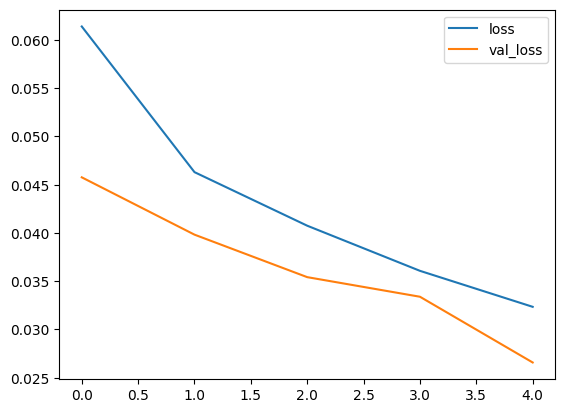

In [43]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

**Making Predictions**

In [44]:
batch= test.as_numpy_iterator().next()

In [45]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [46]:
input_text=vectorizer('You Freaking Suck! I am going to hit you.')

In [47]:
res = model.predict(batch_X)

1/1 [==============================] - 1s 788ms/step


In [48]:
res.flatten()

array([2.5156908e-06, 1.1860781e-19, 8.0507832e-08, 4.3019030e-10,
       1.8610967e-08, 2.6030847e-08, 5.9756241e-03, 8.8946184e-10,
       3.8477249e-04, 3.1609401e-05, 3.4822145e-04, 2.1240741e-04,
       4.7836180e-05, 5.4291752e-16, 2.0119455e-06, 3.0510503e-08,
       7.8806062e-07, 7.6001368e-07, 2.7218522e-04, 1.0602139e-13,
       1.4182583e-05, 4.2339929e-07, 7.6298784e-06, 6.3446473e-06,
       1.0756355e-03, 1.6183225e-11, 9.6215110e-05, 5.1682373e-06,
       5.7794710e-05, 4.9429007e-05, 3.6165916e-06, 3.6984884e-19,
       1.2174742e-07, 8.0449108e-10, 3.0791821e-08, 4.2131603e-08,
       2.2819597e-05, 1.4092466e-16, 1.1167608e-06, 1.6347302e-08,
       3.7996804e-07, 4.7778440e-07, 7.6022763e-05, 4.9114435e-15,
       4.1644244e-06, 8.4423952e-08, 1.6370474e-06, 1.7864267e-06,
       2.5339874e-05, 1.5816444e-16, 1.2177975e-06, 1.6994191e-08,
       4.1661454e-07, 4.9644819e-07, 5.1992214e-03, 5.7901101e-11,
       9.6800410e-05, 6.9518533e-06, 1.3788493e-04, 6.3029634e

In [49]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [50]:
pre = Precision()
re= Recall()
acc= CategoricalAccuracy()

In [51]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 73ms/step


In [52]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.862356960773468, Recall:0.8221763372421265, Accuracy:0.4874624013900757


In [5]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 10.3 M

In [55]:
!pip install typing_extensions==3.10.0.0

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
sqlalchemy 2.0.23 requires typing-extensions>=4.2.0, but you have typing-extensions 3.10.0.0 which is incompatible.
arviz 0.15.1 requires typing-extensions>=4.1.0, but you have typing-extensions 3.10.0.0 which is incompatible.
chex 0.1.7 requires typing-extensions>=4.2.0; python_version < "3.11", but you have typing-extensions 3.10.0.0 which is incompatible.
fastapi 0.104.1 requires typing-extensions>=4.8.0, but you have typing-extensions 3.10.0.0 which is incompatible.
flax 0.7.5 requires typing-extensions>=4.2, but you have typing-extensions 3.10.0.0 which is incompa

In [64]:
import gradio

ImportError: ignored

In [57]:
model.save('toxicity.h5')

In [58]:
model = tf.keras.models.load_model('toxicity.h5')

In [59]:
input_str = vectorizer('hey i freaken hate you!')

In [60]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 669ms/step


In [62]:
print(res)

[[0.82683194 0.00278701 0.07914875 0.01151101 0.307309   0.056384  ]]


In [61]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [ ]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)